# Data Ingestion & ETL

In [148]:
# !pip install pandas sqlalchemy pymongo
import pandas as pd
import hashlib
from sqlalchemy import create_engine

In [149]:
# Load dataset
file_path = "ChurnDataset.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head(3)

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [150]:
print("Schema (column types):")
print(df.dtypes)

print("\nNull values per column:")
print(df.isnull().sum())

Schema (column types):
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Null values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            

In [151]:
with open(file_path, "rb") as f:
    file_hash = hashlib.md5(f.read()).hexdigest()

print("📦 File checksum (MD5):", file_hash)

# This code calculates and displays a unique MD5 checksum (fingerprint) for any file — useful for:
# Verifying file integrity
# Detecting file changes or corruption
# Comparing two files to see if they are identical
# If you change even one character in the file, this hash will change completely.

📦 File checksum (MD5): 0f9de68e012bd3aed5fa7cdc9fc421af


In [152]:
processed_path = r"C:\Users\kansa\ChurnPrediction\Processed\telco_raw.csv"
df.to_csv(processed_path, index=False)
print(f"✅ Processed file saved at: {processed_path}")

✅ Processed file saved at: C:\Users\kansa\ChurnPrediction\Processed\telco_raw.csv


In [153]:
import os
from sqlalchemy import create_engine

# Ensure folder exists
os.makedirs("data", exist_ok=True)

engine = create_engine("sqlite:///data/telco.db")
df.to_sql("telco_raw", engine, if_exists="replace", index=False)

print("✅ Data saved to SQLite (table: telco_raw)")

✅ Data saved to SQLite (table: telco_raw)


In [154]:
print("📊 Summary:")
print(f"Total rows: {len(df)}")
print(f"Columns: {len(df.columns)}")
print("Checksum:", file_hash)

📊 Summary:
Total rows: 7043
Columns: 21
Checksum: 0f9de68e012bd3aed5fa7cdc9fc421af


In [155]:
sample_df = pd.read_sql("SELECT * FROM telco_raw LIMIT 5", engine)
print("\nSample 5 rows from SQLite:")
print(sample_df)


Sample 5 rows from SQLite:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streamin

# Data cleaning & preprocessing

In [156]:
# errors='coerce' → invalid parsing will be set as NaN (Not a Number) instead of raising an error.
# errors='ignore' → leaves the invalid values as-is.
# errors='raise' (default) → raises an exception if there’s any invalid data.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [157]:
print("Shape before dropping duplicates:", df.shape)
df = df.drop_duplicates(subset='customerID')
print("Shape after dropping duplicates:", df.shape)

Shape before dropping duplicates: (7043, 21)
Shape after dropping duplicates: (7043, 21)


In [158]:
binary_cols=['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col]=df[col].map({'Yes':1,'No':0})

In [159]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [160]:
cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaymentMethod']

for col in cat_cols:
    df[col] = df[col].astype('category')


In [161]:
print(df.dtypes)

customerID            object
gender              category
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling       int64
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object


In [162]:
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-12','12-24','24-48','48-60','60-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)


In [163]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0-12
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,24-48
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0-12
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,24-48
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0-12


In [164]:
# # Columns to OHE
# ohe_cols = ['InternetService', 'Contract', 'PaymentMethod']
# # Apply one-hot encoding
# df_ohe = pd.get_dummies(df, columns=ohe_cols, drop_first=True)  # drop_first=True avoids dummy variable trap
# Optionally OHE for non-binary categories (depending on model)

In [165]:
cleaned_path = r"C:\Users\kansa\ChurnPrediction\Processed\telco_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned data saved at: {cleaned_path}")

# Update SQLite table
df.to_sql("telco_cleaned", engine, if_exists="replace", index=False)
print("✅ Cleaned data updated in SQLite (table: telco_cleaned)")


✅ Cleaned data saved at: C:\Users\kansa\ChurnPrediction\Processed\telco_cleaned.csv
✅ Cleaned data updated in SQLite (table: telco_cleaned)


# Exploratory Data Analysis & KPIs

In [166]:
cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaymentMethod']

for col in cat_cols:
    df[col] = df[col].astype('object')

# Total customers
total_customers = len(df)

# Churn rate overall
churn_rate = df['Churn'].mean()

# Monthly revenue metrics
avg_monthly_charge = df['MonthlyCharges'].mean()
total_monthly_revenue = df['MonthlyCharges'].sum()

# Revenue by contract type
revenue_by_contract = df.groupby('Contract')['MonthlyCharges'].mean()

# Churn by segment (Contract)
churn_by_contract = df.groupby('Contract')['Churn'].mean()

# Service adoption counts (StreamingTV, TechSupport, etc.)
service_cols = ['StreamingTV', 'StreamingMovies', 'TechSupport', 'OnlineSecurity', 'OnlineBackup']
service_adoption = df[service_cols].sum()

# Tenure distribution
tenure_distribution = df['tenure'].describe()

# Store KPIs in a dict for quick reference
kpis = {
    "total_customers": total_customers,
    "churn_rate": churn_rate,
    "avg_monthly_charge": avg_monthly_charge,
    "total_monthly_revenue": total_monthly_revenue,
    "revenue_by_contract": revenue_by_contract.to_dict(),
    "churn_by_contract": churn_by_contract.to_dict(),
    # "service_adoption": service_adoption.to_dict(),
    "tenure_distribution": tenure_distribution.to_dict()
}

kpis


{'total_customers': 7043,
 'churn_rate': 0.2653698707936959,
 'avg_monthly_charge': 64.76169246059918,
 'total_monthly_revenue': 456116.6,
 'revenue_by_contract': {'Month-to-month': 66.39849032258064,
  'One year': 65.04860828241684,
  'Two year': 60.770412979351036},
 'churn_by_contract': {'Month-to-month': 0.4270967741935484,
  'One year': 0.11269517990495587,
  'Two year': 0.02831858407079646},
 'tenure_distribution': {'count': 7043.0,
  'mean': 32.37114865824223,
  'std': 24.55948102309423,
  'min': 0.0,
  '25%': 9.0,
  '50%': 29.0,
  '75%': 55.0,
  'max': 72.0}}

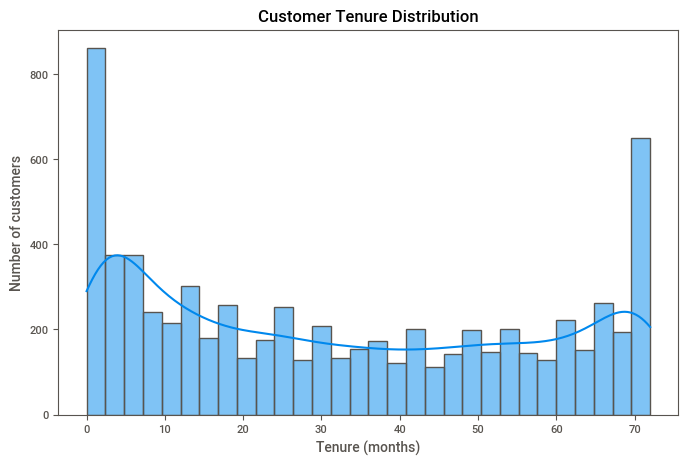

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of customers")
plt.show()


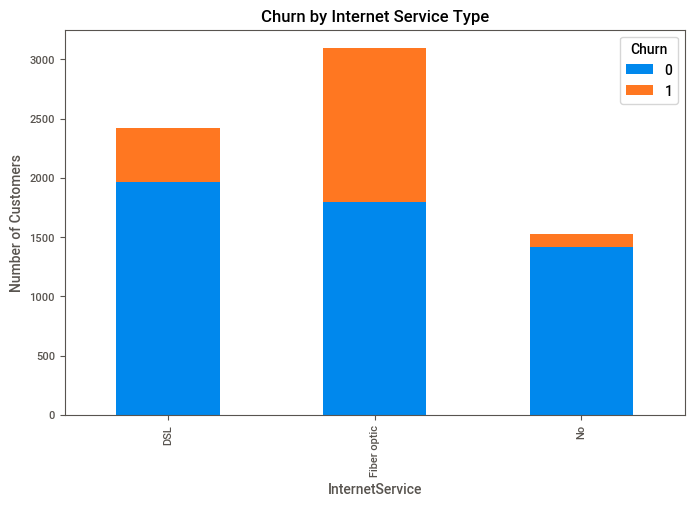

In [168]:
churn_vs_service = df.groupby(['InternetService', 'Churn']).size().unstack()
churn_vs_service.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Churn by Internet Service Type")
plt.ylabel("Number of Customers")
plt.show()


In [169]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Telco Churn EDA", explorative=True)
# Option 1: Inline in notebook without widgets
# profile.to_notebook_iframe()
# Option 2: Save report to HTML
# profile.to_file("telco_eda_report.html")

In [170]:
# pandas_profiling → auto-report of dataset stats, correlations, missing values.
# sweetviz → interactive comparison & report
# !pip install sweetviz
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html("telco_sweetviz_report.html")


# Feature engineering

In [171]:
service_cols = [
    'PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

for col in service_cols:
    print(f"{col} unique values: {df[col].unique()}")


PhoneService unique values: [0 1]
OnlineSecurity unique values: ['No' 'Yes' 'No internet service']
OnlineBackup unique values: ['Yes' 'No' 'No internet service']
DeviceProtection unique values: ['No' 'Yes' 'No internet service']
TechSupport unique values: ['No' 'Yes' 'No internet service']
StreamingTV unique values: ['No' 'Yes' 'No internet service']
StreamingMovies unique values: ['No' 'Yes' 'No internet service']


In [172]:
service_cols = [
    'PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

# Map values: 'No internet service' or 'No' → 0, 'Yes' → 1
df[service_cols] = df[service_cols].replace({
    'No internet service': 0,
    'No': 0,
    'Yes': 1
})

# Ensure all columns are numeric (int)
df[service_cols] = df[service_cols].astype(int)

# Sum across services
df['num_services'] = df[service_cols].sum(axis=1)

# Check
df[['PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','num_services']].head()


,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,num_services
0,0,0,1,0,0,0,0,1
1,1,1,0,1,0,0,0,3
2,1,1,1,0,0,0,0,3
3,0,1,0,1,1,0,0,3
4,1,0,0,0,0,0,0,1


In [173]:
# Avoid divide-by-zero
df['avg_monthly_ratio'] = df.apply(lambda row: row['TotalCharges']/row['tenure'] 
                                   if row['tenure']>0 else row['MonthlyCharges'], axis=1)


In [174]:
df['is_senior_and_no_support'] = ((df['SeniorCitizen']==1) & (df['TechSupport']==0)).astype(int)


In [175]:
feature_path = r"C:\Users\kansa\ChurnPrediction\Processed/telco_features.csv"
df.to_csv(feature_path, index=False)
df.to_sql("telco_features", engine, if_exists="replace", index=False)
print(f"✅ Feature-engineered dataset saved at {feature_path}")

✅ Feature-engineered dataset saved at C:\Users\kansa\ChurnPrediction\Processed/telco_features.csv


In [176]:
summary_features = df[['tenure_group','num_services','avg_monthly_ratio','is_senior_and_no_support']]

print("✅ Feature engineering summary:")
print(summary_features.head())

✅ Feature engineering summary:
  tenure_group  num_services  avg_monthly_ratio  is_senior_and_no_support
0         0-12             1          29.850000                         0
1        24-48             3          55.573529                         0
2         0-12             3          54.075000                         0
3        24-48             3          40.905556                         0
4         0-12             1          75.825000                         0


# Predictive modeling (churn classification)

In [177]:
print(df.isna().sum())

customerID                   0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             0
PaymentMethod                0
MonthlyCharges               0
TotalCharges                11
Churn                        0
tenure_group                11
num_services                 0
avg_monthly_ratio            0
is_senior_and_no_support     0
dtype: int64


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Features and target
X = df.drop(['customerID','Churn'], axis=1)
y = df['Churn']

# Define numeric and categorical columns
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','avg_monthly_ratio','num_services']
categorical_cols = X.select_dtypes(include=['uint8', 'bool']).columns.tolist()  # already 0/1 encoded

# Numeric transformer: impute missing values with median + scale
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer: impute missing values with most frequent value
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply transformations
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, stratify=y, test_size=0.2, random_state=42
)

print("✅ Data ready: X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


✅ Data ready: X_train shape: (5634, 5) X_test shape: (1409, 5)


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]

print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1035
           1       0.50      0.75      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409

ROC-AUC: 0.825589656152316


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=200,
        scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✅ {name} trained successfully")


✅ Logistic Regression trained successfully
✅ Random Forest trained successfully


C:\Users\kansa\anaconda3\envs\nlp_env\lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost trained successfully



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1035
           1       0.50      0.75      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409

ROC-AUC: 0.825589656152316


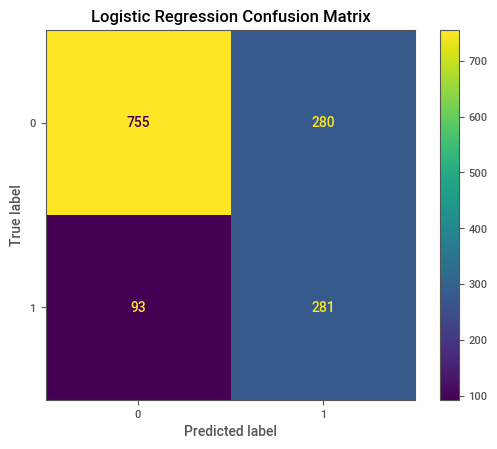

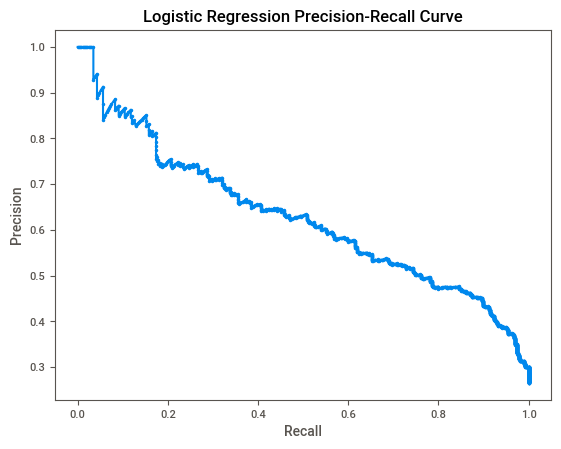


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1035
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

ROC-AUC: 0.7901999534991863


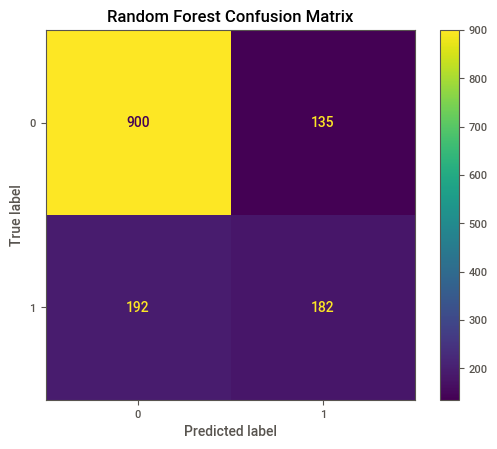

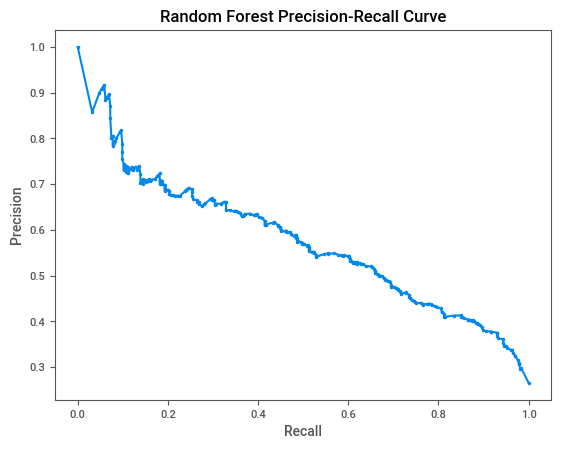


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.53      0.63      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.75      0.76      1409

ROC-AUC: 0.7955798393138547


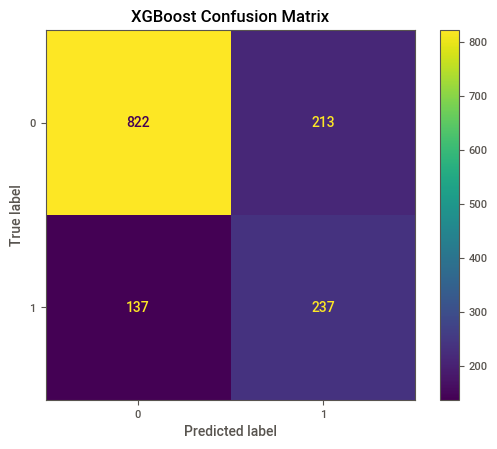

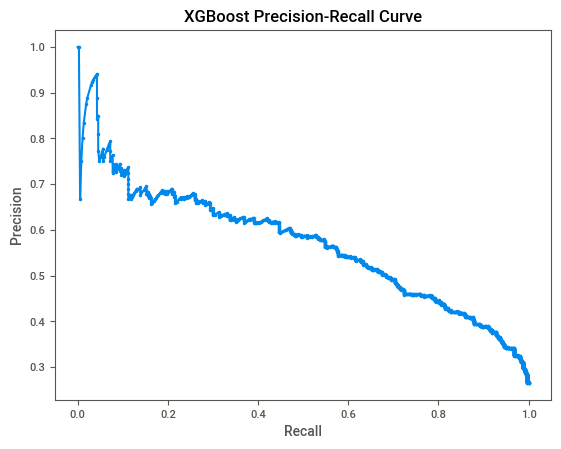

In [181]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

for name, model in trained_models.items():
    print(f"\n--- {name} ---")
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Classification report
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"{name} Precision-Recall Curve")
    plt.show()


In [182]:
# from sklearn.ensemble import RandomForestClassifier

# # Train Random Forest
# rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
# rf.fit(X_train, y_train)

# # Predictions
# y_pred_rf = rf.predict(X_test)
# y_prob_rf = rf.predict_proba(X_test)[:,1]


In [183]:
# Average monthly revenue per customer
avg_revenue = df['MonthlyCharges'].mean()

# Choose the model for business impact (e.g., Random Forest)
model_name = "Random Forest"
model = trained_models[model_name]

# Predict on X_test
y_pred = model.predict(X_test)

# Number of predicted churners
predicted_churners = (y_pred == 1).sum()
total_customers_test = y_test.shape[0]

# Estimated monthly revenue at risk / retention savings
retention_savings = predicted_churners * avg_revenue

print(f"Business implication ({model_name}): Retaining {predicted_churners} predicted churners "
      f"out of {total_customers_test} test customers could save approximately "
      f"${retention_savings:.2f} per month.")


Business implication (Random Forest): Retaining 317 predicted churners out of 1409 test customers could save approximately $20529.46 per month.


# Experimentation & A/B (Hypothesis testing)

## 7A — Sample-size calculator (proportions)

In [184]:
from math import sqrt, ceil
from scipy.stats import norm

def sample_size_proportions(p1, p2, alpha=0.05, power=0.8):
    """
    Calculates the required sample size per group for two-proportion A/B test.
    
    p1, p2 : expected proportions in control & treatment
    alpha : significance level (default 0.05)
    power : statistical power (default 0.8)
    """
    pbar = 0.5*(p1 + p2)
    za = norm.ppf(1-alpha/2)
    zb = norm.ppf(power)
    num = (za*sqrt(2*pbar*(1-pbar)) + zb*sqrt(p1*(1-p1) + p2*(1-p2)))**2
    den = (p1 - p2)**2
    return int(ceil(num))

# Example usage
required_n = sample_size_proportions(p1=0.10, p2=0.12)
print(f"Required sample size per group: {required_n}")


Required sample size per group: 2


## 7B — Randomization & sanity checks

In [185]:
import pandas as pd
import numpy as np
import hashlib

def assign_experiment(df, seed=42):
    """
    Assign customers to treatment/control deterministically using hash of customerID.
    """
    def hash_to_group(customerID):
        h = int(hashlib.sha256(str(customerID).encode('utf-8')).hexdigest(), 16)
        return 'treatment' if h % 2 == 0 else 'control'
    
    df['experiment_group'] = df['customerID'].apply(hash_to_group)
    
    # Check sample ratio
    ratio = df['experiment_group'].value_counts(normalize=True)
    print("Sample ratio:\n", ratio)
    
    return df

# Pre-experiment balance check
def balance_check(df, metrics):
    """
    Check balance of key metrics between treatment and control
    """
    print("\nPre-experiment balance check:")
    for m in metrics:
        mean_vals = df.groupby('experiment_group')[m].mean()
        print(f"{m}:\n{mean_vals}\n")

# Example usage
df_exp = assign_experiment(df)
balance_check(df_exp, ['tenure', 'MonthlyCharges', 'TotalCharges'])


Sample ratio:
 experiment_group
treatment    0.511146
control      0.488854
Name: proportion, dtype: float64

Pre-experiment balance check:
tenure:
experiment_group
control      32.086262
treatment    32.643611
Name: tenure, dtype: float64

MonthlyCharges:
experiment_group
control      64.189936
treatment    65.308514
Name: MonthlyCharges, dtype: float64

TotalCharges:
experiment_group
control      2247.883023
treatment    2317.219126
Name: TotalCharges, dtype: float64



## 7C — Statistical tests (post-experiment)

In [186]:
import statsmodels.api as sm

def proportion_test(df, metric='Churn', group_col='experiment_group'):
    """
    Perform two-proportion z-test
    """
    conv_treatment = df[df[group_col]=='treatment'][metric].sum()
    conv_control = df[df[group_col]=='control'][metric].sum()
    n_treatment = df[group_col].value_counts()['treatment']
    n_control = df[group_col].value_counts()['control']
    
    count = np.array([conv_treatment, conv_control])
    nobs = np.array([n_treatment, n_control])
    stat, pval = sm.stats.proportions_ztest(count, nobs)
    
    print(f"{metric} - z-stat: {stat:.4f}, p-value: {pval:.4f}")
    return stat, pval
proportion_test(df)

Churn - z-stat: 0.8999, p-value: 0.3682


(0.8999005539500304, 0.36817317531592675)

## Bootstrap CI for continuous metrics (e.g., ARPU / MonthlyCharges)

In [187]:
def bootstrap_diff(x, y, n_iter=5000, alpha=0.05):
    diffs=[]
    for _ in range(n_iter):
        dx = np.random.choice(x, size=len(x), replace=True)
        dy = np.random.choice(y, size=len(y), replace=True)
        diffs.append(dx.mean()-dy.mean())
    ci = np.percentile(diffs, [100*alpha/2, 100*(1-alpha/2)])
    print(f"Bootstrap {100*(1-alpha)}% CI: {ci}")
    return ci

## 7D — Automated experiment report

In [188]:
def experiment_report(df, metric='Churn', revenue_col='MonthlyCharges', alpha=0.05):
    report_md = "# Experiment Report\n\n"

    # Sample size
    counts = df['experiment_group'].value_counts()
    report_md += f"**Sample size:** Treatment={counts['treatment']}, Control={counts['control']}\n\n"

    # Assignment checks
    balance_metrics = df.groupby('experiment_group')[['tenure', revenue_col]].mean()
    report_md += f"**Pre-experiment balance:**\n{balance_metrics}\n\n"

    # Binary metric: proportion test
    conv_treatment = df[df['experiment_group']=='treatment'][metric].sum()
    conv_control = df[df['experiment_group']=='control'][metric].sum()
    n_treatment = counts['treatment']
    n_control = counts['control']
    stat, pval = sm.stats.proportions_ztest([conv_treatment, conv_control],[n_treatment, n_control])
    report_md += f"**Proportion z-test:** stat={stat:.3f}, p-value={pval:.4f}\n\n"

    # Continuous metric: bootstrap CI
    treatment_vals = df[df['experiment_group']=='treatment'][revenue_col].values
    control_vals = df[df['experiment_group']=='control'][revenue_col].values
    ci = bootstrap_diff(treatment_vals, control_vals)
    effect_size = treatment_vals.mean() - control_vals.mean()
    report_md += f"**Continuous metric:** Effect size={effect_size:.2f}, 95% CI={ci}\n\n"

    # Business lift estimate
    lift = effect_size * n_treatment
    report_md += f"**Business lift estimate:** ${lift:.2f}\n\n"

    # Recommendation
    recommendation = "Rollout" if pval < alpha and effect_size > 0 else "Do not rollout / segment"
    report_md += f"**Recommendation:** {recommendation}\n"

    return report_md

# Generate report
report = experiment_report(df)
print(report)


Bootstrap 95.0% CI: [-0.25038143  2.4893949 ]
# Experiment Report

**Sample size:** Treatment=3600, Control=3443

**Pre-experiment balance:**
                     tenure  MonthlyCharges
experiment_group                           
control           32.086262       64.189936
treatment         32.643611       65.308514

**Proportion z-test:** stat=0.900, p-value=0.3682

**Continuous metric:** Effect size=1.12, 95% CI=[-0.25038143  2.4893949 ]

**Business lift estimate:** $4026.88

**Recommendation:** Do not rollout / segment

